In [1]:
# Descomenta la siguiente línea para instalar las dependencias
# %pip install matplotlib numpy

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mpl.rc("text", usetex=False)
mpl.rc("font", size=12)
mpl.rc("figure", dpi=100, figsize=(5, 4))

En esta parte del curso discutiremos sobre modelos basados en reflejos, en particular utilizando técnicas de **Aprendizaje máquina**.

- El aprendizaje máquina (*machine learning* en inglés) es el proceso de transformar *datos* en un *modelo*.
- Las técnicas que discutiremos también se pueden aplicar a distintas clases de modelos.
- Los modelos basados en reflejos se caracterizan por un proceso de inferencia muy rápido.

El siguiente esquema muestra la forma general de estos modelos.

<center>
    <img src="./modelo.png" />
</center>

Nuestro modelo es un predictor $f$ que toma una entrada $x$ y produce alguna salida $y$.

La entrada puede usualmente ser arbitraria (una imágen, una oración, etc.), pero la forma de la salida $y$ está restringida por lo general. Estas restricciones son las que determinan el tipo de predicción que se lleva a cabo.

Por el momento, discutiremos sobre dos tipos de predicciones.

<center>
    <b>Clasificación binaria</b>
</center>

En este tipo de problemas de predicción, la salida $y$ se restringe a dos valores, uno positivo ($+1$) y uno negativo ($-1$).

En estos contextos, el predictor $f$ es llamado *clasificador* y la salida $y$ es llamada *etiqueta*, *clase* o *categoría*.

<center>
    <img src="./clasificacion-binaria.png" />
</center>

Un problema clásico modelado como un problema de clasificación binaria es el de determinar si un correo electrónico es "spam" o no (*¿spam o ham?*). La entrada en este caso es una representación del contenido del correo y la salida es $+1$ (spam) o $-1$ (ham).

Otra aplicación es detección de fraudes, de entrada es la información de la transacción bancaria y la salida si es o no fraudulenta.

Otros problemas donde nos interese separar las entradas en dos grupos son compatibles con clasificación binaria.

Una generalización de la clasificación binaria es la clasificación multiclase, donde la salida $y$ puede ser una de $K$ posibilidades, por ejemplo, en la clasificación de dígitos escritos a mano, entra una imágen al clasificador y sale un valor $y \in \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9 \}$.

<center>
    <b>Regresión</b>
</center>

En este tipo de problemas de predicción, la salida $y$ se restringe a el conjunto de los reales $\mathbb{R}$.

En estos contextos, la salida $y$ es usualmente llamada *respuesta* u *objetivo*.

<center>
    <img src="./regresion.png" />
</center>

La distinción principal entre la clasificación y la regresión es que la primera tiene salidas *discretas*, mientras que la segunda tiene salidas *continuas*.

Los problemas de regresión han sido históricamente utilizados para interpolar o extrapolar información. Desde el movimiento de los cuerpos celestes en el cosmos 😌, hasta el uso de herramientas matemáticas para justificar la eugenesia 🤢.

Podemos por ejemplo aplicar esta técnica a predicción de índices de desarrollo a partir de una imágen satelital de tu vecindario, predecir el precio de una casa a partir de una variedad de factores, o incluso predecir el tiempo en que llegará la pizza a tu casa.

<center>
    <b>Predicción estructurada</b>
</center>

En este tipo de problemas de predicción, vamos a (mas o menos) capturar el resto de los tipos. La salida $y$ puede ser un objeto complejo, como una oración o una imagen, por lo que el espacio de posibles salidas es enorme.

<center>
    <img src="./estructurada.png" />
</center>

Una aplicación es la traducción automática, a partir de una oración en un lenguaje, predecir su traducción en otra.

También podría ser el caso de traducir una imágen a una oración que la describe.

En una imagen, identificar los rostros humanos que aparecen en ella.

Quizá a algunos de nosotros nos puedan parecer mágicas/distópicas/futuristas estas aplicaciones, sin embargo en muchos casos, un problema de predicción estructurada puede replantearse como una secuencia de problemas de clasificación multiclase. Por ejemplo, para predecir una oración, podemos predecir una palabra a la vez, de izquierda a derecha.

# Regresión lineal

Supongamos que recolectamos o se nos provee con **datos de entrenamiento**, denotados $\mathcal{D}_\mathrm{train}$, que consisten de un conjunto de ejemplos. Cada **ejemplo** (también llamado punto, instancia o caso) consiste de una entrada $x$ y una salida $y$.

<center>
    <img src="./regresion-framework.png" />
</center>

Un algoritmo de aprendizaje toma los datos de entrenamiento y produce un modelo $f$ (nuestro predictor). Estos modelos nos van a permitir hacer predicciones sobre nuevas entradas nunca antes vistas durante el entrenamiento. En el diagrama de arriba, se alimenta la entrada $3$ al predictor para obtener $f(3)$ (en este ejemplo $2.71$).

En Python podemos definir los datos de entrenamiento como una lista de parejas $(x, y)$

In [4]:
train_examples = [
    (1, 1),
    (2, 3),
    (4, 3),
]

Supongamos que nuestro predictor es muy simple y corresponde a una función lineal. En este ejemplo vamos a definir en Python explícitamente el modelo, sin embargo mas adelante vamos a **aprenderlo** automáticamente.

In [5]:
def f(x):
    return 0.57 * x + 1.0

Para visualizar los datos de entrenamiento, el modelo y la predicción de una nueva entrada $3$ podemos graficar $y$ contra $x$ en el plano cartesiano.

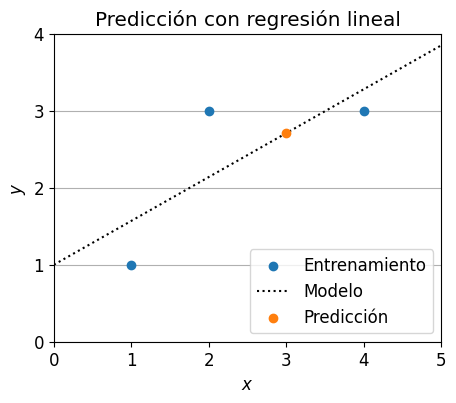

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.set_axisbelow(True)

xs = [x for x, y in train_examples]
ys = [y for x, y in train_examples]

xfs = np.linspace(0, 5)
yfs = f(xfs)

ax.set_xlim([0, 5])
ax.set_ylim([0, 4])
ax.xaxis.set_ticks(range(6))
ax.yaxis.set_ticks(range(5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Predicción con regresión lineal")

ax.grid(axis="y")
ax.scatter(xs, ys, c="C0", zorder=1, label="Entrenamiento")
ax.plot(xfs, yfs, ":", c="black", zorder=2, label="Modelo")
ax.scatter(3, f(3), c="C1", zorder=3, label="Predicción")

ax.legend();

Hay tres decisiones de diseño que debemos hacer para especificar el algoritmo de aprendizaje por completo:
1. ¿Qué predictores $f$ se le permite al algoritmo producir? ¿Solo lineas o también curvas? En otras palabras, ¿Cuál es la **clase de hipótesis**?
2. ¿Cómo juzga el algoritmo de aprendizaje cuál predictor es bueno? En otras palabras, ¿Cuál es la **función de pérdida**?
3. ¿Cómo el algoritmo de aprendizaje realmente encuentra el mejor predictor? En otras palabras, ¿Cuál es el **algoritmo de optimización**?

<center>
    <b>Clase de hipótesis</b>
</center>

Consideremos la primer decisión de diseño, sobre cuál es la clase de hipótesis.

Un posible predictor es el que se muestra en rojo, donde cruza el eje $y$ en $1$ y la pendiente es $0.57$. Otro predictor es el que se muestra en morado, donde cruza el eje $y$ en $2$ y la pendiente es $0.2$.

En general, consideremos todos los predictores de la forma

$$f(x) = w_1 + w_2x$$

que cruzan el eje $y$ en $w_1$ y la pendiente es $w_2$, donde ambos valores pueden ser números reales arbitrarios.

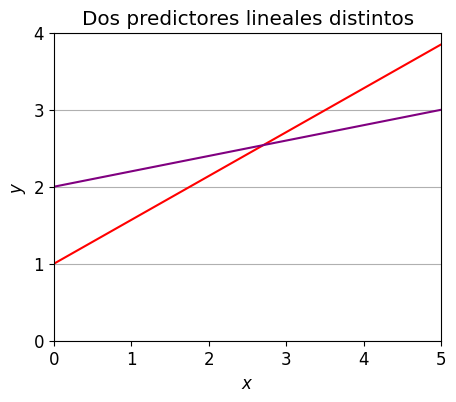

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.set_axisbelow(True)

xs = np.linspace(0, 5)
f1ys = 1.0 + 0.57 * xs
f2ys = 2.0 + 0.20 * xs

ax.set_xlim([0, 5])
ax.set_ylim([0, 4])
ax.xaxis.set_ticks(range(6))
ax.yaxis.set_ticks(range(5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Dos predictores lineales distintos")

ax.grid(axis="y")
ax.plot(xs, f1ys, c="red")
ax.plot(xs, f2ys, c="purple");

Ahora generalicemos esta clase de hipótesis utilizando notación vectorial. Empacamos la altura y pendiente en un vector al que llamaremos **vector de pesos**, estos corresponderán a los parámetros del modelo.

$$\mathbf{w} = [w_1, w_2]$$

De forma similar, definimos una función $\phi$ llamada **extractor de características**, el cuál toma $x$ y lo convierte en un **vector de características**.

$$\phi(x) = [1, x]$$

Ahora podemos definir el predictor $f_{\mathbf{w}}$ que toma $x$ y calcula el producto punto entre el vector de pesos $\mathbf{w}$ y el vector de características $\phi(x)$.

$$f_{\mathbf{w}}(x) = \mathbf{w}\cdot\phi(x)$$

Finalmente, definimos la clase de hipótesis $\mathcal{F}$ como el conjnuto de todos los posibles predictores $f_{\mathbf{w}}$.

$$\mathcal{F} = \left\{ f_{\mathbf{w}} : \mathbf{w} \in \mathbb{R}^2 \right\}.$$

In [8]:
def phi(x):
    return np.array([1, x])

In [9]:
phi(3)

array([1, 3])

<center>
    <b>Función de pérdida</b>
</center>

La siguiente decisión de diseño es cómo juzgar cada uno de los predictores.

Intuitivamente, un predictor es bueno si puede ajustarse a los datos de entrenamiento. Consideremos la separación entre la salida predecida $f_{\mathbf{w}}(x)$ y la salida real $y$, a esto lo conocemos como el **residual**.

Consideramos entonces la función de pérdida sobre un ejemplo dado con respecto a $\mathbf{w}$ como el cuadrado del residual, de tal manera que los residuales grandes representan una pérdida mayor que los residuales pequeños.

$$\mathrm{Loss}(x, y, \mathbf{w}) = (f_{\mathbf{w}}(x)-y)^2$$

A esta función de pérdida le llamamos pérdida cuadrada y mide que tan malo es el modelo $f$ para un ejemplo particular.

Para cada ejemplo, tenemos una pérdida calculada a partir del vector de pesos (que representan nuestro modelo) y el ejemplo. Ahora definimos la pérdida de los datos de entrenamiento (o error de entrenamiento) que toma el promedio de las pérdidas de cada ejemplo en los datos de entrenamiento.

$$\mathrm{TrainLoss}(\mathbf{w}) = \frac{1}{|\mathcal{D}_{\mathrm{train}}|}\sum_{(x, y)\in\mathcal{D}_\mathrm{train}} \mathrm{Loss}(x, y, \mathbf{w})$$

In [10]:
def loss(x, y, w):
    return (w.dot(phi(x)) - y) ** 2

Veamos cuáles son las pérdidas de los ejemplos del conjunto de entrenamiento

In [11]:
loss(*train_examples[0], np.array([1.0, 0.57]))

0.3248999999999998

In [12]:
loss(*train_examples[1], np.array([1.0, 0.57]))

0.7396000000000006

In [13]:
loss(*train_examples[2], np.array([1.0, 0.57]))

0.07839999999999989

Y ahora calculemos la pérdida sobre todos los ejemplos del conjnuto de entrenamiento.

In [14]:
def train_loss(w):
    total = sum(loss(x, y, w) for x, y in train_examples)
    average = 1.0 / len(train_examples) * total
    return average

In [15]:
train_loss(np.array([1.0, 0.57]))

0.38096666666666673

*¿Qué pasa con la pérdida cuadrática promedio cuando tenemos valores atípicos (outliers) en los datos e entrenamiento?*

Podemos visualizar cómo se comporta la pérdida de entrenamiento graficando su valor para varios vectores de pesos.

In [16]:
w1min, w1max = (-10, 10)
w2min, w2max = (-10, 10)
samples = 100

In [17]:
def train_loss_vec(w1, w2):
    total = sum(((w1 + w2 * x) - y) ** 2 for x, y in train_examples)
    average = 1.0 / len(train_examples) * total
    return average

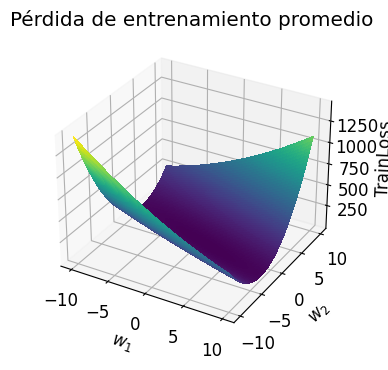

In [18]:
fig = plt.figure()
ax = plt.axes(projection="3d")

w1, w2 = np.meshgrid(
    np.linspace(w1min, w1max, samples),
    np.linspace(w2min, w2max, samples),
)
tl = train_loss_vec(w1, w2)

ax.set_title("Pérdida de entrenamiento promedio")
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.set_zlabel("TrainLoss")

ax.plot_surface(
    w1,
    w2,
    tl,
    rstride=1,
    cstride=1,
    antialiased=False,
    cmap="viridis",
    edgecolor="none",
    linewidth=0,
);

<center>
    <b>Algoritmo de optimización</b>
</center>

Ahora discutimos la tercer decisión de diseño, cómo podemos calcular el mejor predictor.

Para responder esta pregunta, nos podemos olvidar de que estamos trabajando con regresión lineal y aprendizaje máquina. Simplemente tenemos una función objetivo $\mathrm{TrainLoss}(\mathbf{w})$ que queremos minimizar.

Comenzamos con una estimación de $\mathbf{w}$ y mejoramos la estimación de forma iterativa para hacer que su valor de acuerdo a la función objetivo disminuya. Finalmente nos detenemos cuando la estimación sea suficientemente buena.

In [19]:
def initial_weights():
    return np.zeros(2)

In [20]:
initial_weights()

array([0., 0.])

Para lograr la mejora progresiva de la estimación consideramos el gradiente de la función objetivo, el cuál corresponde a un vector que apunta hacia dónde disminuye más empinadamente la función objetivo.

$$\nabla_\mathbf{w}\mathrm{TrainLoss}(\mathbf{w})$$

In [21]:
def gradient_train_loss(w):
    total = sum(2 * (w.dot(phi(x)) - y) * phi(x) for x, y in train_examples)
    average = 1.0 / len(train_examples) * total
    return average

In [22]:
gradient_train_loss(np.array([0.0, 0.0]))

array([ -4.66666667, -12.66666667])

El proceso de optimización iterativa es llamado **descenso de gradiente**, funciona de la siguiente manera:

1. Inicializamos $\mathbf{w}$ a algún valor (p.ej. vector de ceros)
2. Luego realizamos la siguiente actualización $T$ veces, llamada la cantidad de épocas (epochs en inglés):
3. Tomamos el vector $\mathbf{w}$ y le restamos un valor escalado del gradiente, donde el factor de escalamiento (o tamaño de paso) se denota $\eta$, este parámetro nos permite controlar qué tan agresivo es el descenso.

In [23]:
def gradient_descent(F, gradientF, init):
    w = init()
    eta = 0.1
    for t in range(10):
        value = F(w)
        gradient = gradientF(w)
        w = w - eta * gradient
        print(f"epoch {t}: w = {w}, F(w) = {value:.4f}, gradientF = {gradient}")

In [24]:
gradient_descent(train_loss, gradient_train_loss, initial_weights)

epoch 0: w = [0.46666667 1.26666667], F(w) = 6.3333, gradientF = [ -4.66666667 -12.66666667]
epoch 1: w = [0.24888889 0.54222222], F(w) = 2.3185, gradientF = [2.17777778 7.24444444]
epoch 2: w = [0.41274074 0.93362963], F(w) = 1.0535, gradientF = [-1.63851852 -3.91407407]
epoch 3: w = [0.36116543 0.70060247], F(w) = 0.6515, gradientF = [0.51575309 2.3302716 ]
epoch 4: w = [0.42865119 0.81788181], F(w) = 0.5208, gradientF = [-0.67485761 -1.17279342]
epoch 5: w = [0.42790944 0.73947672], F(w) = 0.4754, gradientF = [0.0074175  0.78405092]
epoch 6: w = [0.46390509 0.77118491], F(w) = 0.4573, gradientF = [-0.35995643 -0.31708187]
epoch 7: w = [0.47790445 0.74170366], F(w) = 0.4479, gradientF = [-0.1399936   0.29481241]
epoch 8: w = [0.50286185 0.74696313], F(w) = 0.4416, gradientF = [-0.24957401 -0.05259462]
epoch 9: w = [0.52037335 0.73321255], F(w) = 0.4365, gradientF = [-0.17511505  0.13750572]


¿Cómo se minimiza la pérdida de entrenamiento promedio?

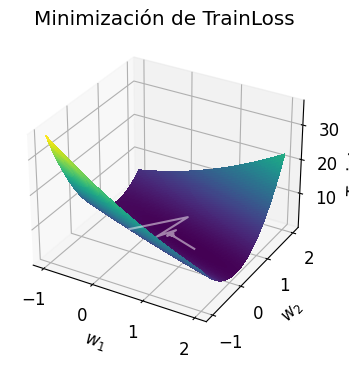

In [25]:
def gradient_descent_viz(F, gradientF, init):
    w = init()
    w1s = [w[0]]
    w2s = [w[1]]
    tls = []
    eta = 0.1
    for t in range(100):
        value = F(w)
        tls.append(value)
        gradient = gradientF(w)
        w = w - eta * gradient
        w1s.append(w[0])
        w2s.append(w[1])
    tls.append(F(np.array([w1s[-1], w2s[-1]])))
    return np.array(w1s), np.array(w2s), np.array(tls)


fig = plt.figure()
ax = plt.axes(projection="3d")

w1, w2 = np.meshgrid(
    np.linspace(-1, 2, samples),
    np.linspace(-1, 2, samples),
)
tl = train_loss_vec(w1, w2)

ax.set_title("Minimización de TrainLoss")
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.set_zlabel("TrainLoss")

w1s, w2s, tls = gradient_descent_viz(train_loss, gradient_train_loss, initial_weights)

ax.plot(w1s, w2s, tls, color="white", alpha=0.5, zorder=10)

ax.plot_surface(
    w1,
    w2,
    tl,
    rstride=1,
    cstride=1,
    antialiased=False,
    cmap="viridis",
    edgecolor="none",
    linewidth=0,
);

## Repaso

**¿Qué predictores son posibles?**

Construimos una *clase de hipótesis*.

En lo que discutimos, consideramos *funciones lineales*,
$$\mathcal{F} = \{ f_\mathbf{w}(x) = \mathbf{w}\cdot\phi(x) \}$$
$$\phi(x) = [1, x]$$

**¿Qué tan bueno es un predictor?**

Construimos una *función de pérdida*.

En lo que discutimos, consideramos la *pérdida cuadrática*,
$$\mathrm{Loss}(x, y, \mathbf{w}) = (f_\mathbf{w}(x) - y)^2$$

**¿Cómo calcular el mejor predictor?**

Construimos un *algoritmo de optimización*.

En lo que discutimos, consideramos el *descenso de gradiente*,
$$\mathbf{w} \gets \mathbf{w} - \eta\nabla\mathrm{TrainLoss}(\mathbf{w})$$

# Clasificación lineal

Al igual que en la regresión lineal, recolectamos o se nos provee con **datos de entrenamiento**, ($\mathcal{D}_\mathrm{train}$), pero ahora estos datos consisten de **ejemplos** con dos entradas reales $(x_1, x_2)$ y una salida binaria $y$ ($+1$ o $-1$).

<center>
    <img src="./classification-framework.png" />
</center>

También vamos a querer construir un algoritmo de aprendizaje que tome los datos de entrenamiento y produzca un modelo $f$, al que llamamos **clasificador**. Estos modelos nos van a permitir clasificar nuevas entradas nunca antes vistas durante el entrenamiento. En el diagrama de arriba, se alimenta la entrada $[2, 0]$ al clasificador para obtener $f([2, 0])$ (en este ejemplo $-1$).

En Python podemos definir los datos de entrenamiento como una lista de parejas $(x, y)$, donde $x$ se representa como una tupla de dos elementos $(x_1, x_2)$.

In [26]:
train_examples = [
    ((0, 2), 1),
    ((-2, 0), 1),
    ((1, -1), -1),
]

Supongamos que nuestro clasificador es muy simple y corresponde a una relación lineal entre la primera y segunda componente de las entradas.

Por el momento, usamos la recta identidad.

In [27]:
def f(x1):
    return x1

Para visualizar los datos de entrenamiento, el modelo y la clasificación de una nueva entrada $[2,0]$ podemos graficar $x_1$ contra $x_2$ en el plano cartesiano. El modelo entonces parte el espacio de entrada en dos, uno donde se clasifican los puntos con $+1$ y otro donde se clasifican con $-1$.

A la frontera entre estas dos divisiones se le llama **frontera de decisión**. Graficamos una flecha perpendicular a la frontera para indicar qué región es la positiva.

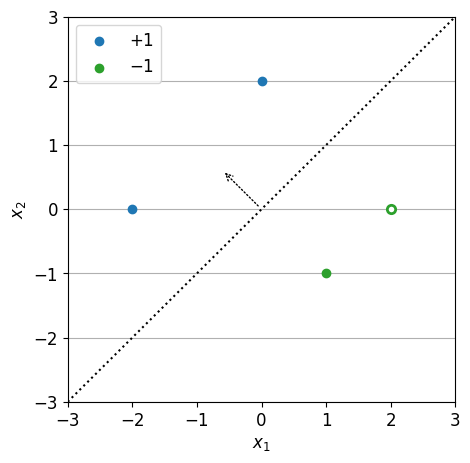

In [28]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.set_axisbelow(True)

xs1plus = [x1 for (x1, x2), y in train_examples if y == +1]
xs2plus = [x2 for (x1, x2), y in train_examples if y == +1]

xs1minus = [x1 for (x1, x2), y in train_examples if y == -1]
xs2minus = [x2 for (x1, x2), y in train_examples if y == -1]

xfs = np.linspace(-3, 3)
yfs = f(xfs)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.xaxis.set_ticks(range(-3, 4))
ax.yaxis.set_ticks(range(-3, 4))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.grid(axis="y")
ax.scatter(xs1plus, xs2plus, c="C0", zorder=1, label="$+1$")
ax.scatter(xs1minus, xs2minus, c="C2", zorder=1, label="$-1$")
ax.plot(xfs, yfs, ":", c="black", zorder=2)
ax.annotate(
    "",
    xy=(0, 0),
    xytext=(-0.6, +0.6),
    arrowprops={
        "arrowstyle": "<-",
        "linestyle": ":",
    },
)
ax.scatter(2, 0, c="white", edgecolors="C2", zorder=3, linewidth=2)

ax.legend();

Retomamos las mismas tres decisiones de diseño para nuestro algoritmo de aprendizaje.

1. ¿Qué clasificadores $f$ se le permite al algoritmo producir? ¿La frontera de decisión debe ser recta o puede curvarse? En otras palabras, ¿Cuál es la **clase de hipótesis**?
2. ¿Cómo juzga el algoritmo de aprendizaje cuál clasificador es bueno? En otras palabras, ¿Cuál es la **función de pérdida**?
3. ¿Cómo el algoritmo de aprendizaje realmente encuentra el mejor clasificador? En otras palabras, ¿Cuál es el **algoritmo de optimización**?

<center>
    <b>Clase de hipótesis</b>
</center>


Vamos a considerar todos los clasificadores de la forma

$$f(x_1, x_2) = \mathrm{sign}(w_1x_1 + w_2x_2)$$

donde

$$\mathrm{sign}(z) = \begin{cases}
+1 &\text{si } z > 0 \\
-1 &\text{si } z < 0 \\
0  &\text{si } z = 0
\end{cases}$$

Donde la frontera de decisión consiste de todos los puntos $(x_1, x_2)$ tal que $w_1x_1+w_2x_2 = 0$.

Intentemos entender mejor lo que esta clase de hipótesis representa.

---

Al igual que en el caso de la regresión lineal, planteamos la clase de hipótesis utilizando notación vectorial.

La clasificación lineal se parametriza por un vector de pesos $\mathbf{w}$.

$$\mathbf{w} = [w_1, w_2]$$

Definimos un extractor de características $\phi$ como la identidad.

$$\phi(x) = [x_1, x_2]$$

Y procedemos a definir el clasificador $f_\mathbf{w}$ que toma $x$ de entrada y calcula el signo del producto punto entre el vector de pesos $\mathbf{w}$ y el vector de características $\phi(x)$.

$$f_\mathbf{w}(x) = \mathrm{sign}(\mathbf{w}\cdot\phi(x))$$

Podemos encontrar un sentido geométrico para estos clasificadores.

- Considerando $\mathbf{w}$ y $\phi(x)$ como vectores, su producto punto es un factor positivo multiplicado por el coseno del ángulo $\theta$ entre ellos. Si $\theta < \pi/2$, entonces $\cos(\theta)$ es positivo y el signo en $f_\mathbf{w}$ ignora las magnitudes. Cuando los vectores son perpendiculares, es porque $\phi(x)$ se encuentra justo sobre la frontera de decisión. 
- Al graficar los ejemplos como puntos en tres dimensiones (la etiqueta siendo la tercera dimensión) el clasificador $f_\mathbf{w}$ corresponde a un plano en el espacio que siempre corta al origen. Todos los puntos por arriba del plano se clasifican positivos y todos por debajo se clasifican negativos.

Finalmente, definimos la clase de hipótesis $\mathcal{F}$ como el conjunto de todos los posibles predictores $f_{\mathbf{w}}$.

$$\mathcal{F} = \left\{ f_{\mathbf{w}} : \mathbf{w} \in \mathbb{R}^2 \right\}.$$

In [29]:
def phi(x):
    return np.array(x)

In [30]:
def sign(z):
    if z > 0:
        return +1
    if z < 0:
        return -1
    return 0

Consideremos el clasificador con $\mathbf{w} = [0.5, 1]$, ¿Qué tal clasifica los datos de entrenamiento?

In [31]:
w = np.array([0.5, 1])

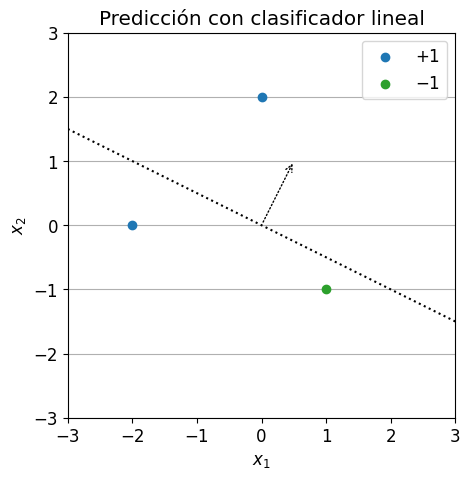

In [32]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.set_axisbelow(True)

xs1plus = [x1 for (x1, x2), y in train_examples if y == +1]
xs2plus = [x2 for (x1, x2), y in train_examples if y == +1]

xs1minus = [x1 for (x1, x2), y in train_examples if y == -1]
xs2minus = [x2 for (x1, x2), y in train_examples if y == -1]

xfs = np.linspace(-3, 3)
yfs = -(w[0] / w[1]) * xfs

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.xaxis.set_ticks(range(-3, 4))
ax.yaxis.set_ticks(range(-3, 4))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Predicción con clasificador lineal")

ax.grid(axis="y")
ax.scatter(xs1plus, xs2plus, c="C0", zorder=1, label="$+1$")
ax.scatter(xs1minus, xs2minus, c="C2", zorder=1, label="$-1$")
ax.plot(xfs, yfs, ":", c="black", zorder=2)
ax.annotate(
    "",
    xy=(0, 0),
    xytext=(w[0], w[1]),
    arrowprops={
        "arrowstyle": "<-",
        "linestyle": ":",
    },
)

ax.legend();

Vemos que dos ejemplos los clasifica correctamente, pero un tercero con etiqueta positiva es clasificado como negativo.

<center>
    <b>Función de pérdida</b>
</center>

Utilizamos una función de pérdida llamada **cero-uno** que regresa cero cuando la etiqueta del ejemplo y el resultado de la clasificación coinciden, y que regresa uno cuando difieren.

$$\mathrm{Loss}_{0-1}(x, y, \mathbf{w}) = \mathbf{1}[f_\mathbf{w}(x) \not= y]$$

In [33]:
def loss(x, y, w):
    return int(sign(phi(x).dot(w)) != y)

In [34]:
loss(*train_examples[0], w)

0

In [35]:
loss(*train_examples[1], w)

1

In [36]:
loss(*train_examples[2], w)

0

$$f_\mathbf{w}(x) = \mathrm{sign}(\mathbf{w}\cdot \phi(x))$$

La pérdida total es simplemente el promedio de la pérdida cero-uno sobre todos los ejemplos de entrenamiento, en este ejemplo sería $\frac{1}{3}$.

Antes de discutir la tercer decisión de diseño (el algoritmo de optimización), veamos otras funciones de pérdida que pueden resultar convenientes de utilizar.

Recordemos que cuando $\mathbf{w}\cdot\phi(x)$ es positiva, la etiqueta predecida es $+1$ debido a que el ángulo interno entre los dos vectores es menor a $90^\circ$.

La magnitud absoluta de este escalar es proporcional a la distancia entre el ejemplo de entrenamiento y la frontera de decisión. Por lo tanto, podemos considerar este escalar como una métrica de qué tan seguros estamos en predecir $+1$. Si la distancia entre un ejemplo y la frontera de decisión es pequeña, entonces pequeños cambios en el modelo pueden producir cambios en la predicción. Si la distancia es muy grande, entonces el modelo pudiera cambiar sin alterar la predicción.

Podemos adecuar este concepto utilizando el **margen**, el cuál representa qué tan correcta es la predicción. Basta multiplicar $\mathbf{w}\cdot\phi(x)$ por la etiqueta de los datos de entrenamiento asociada a $x$. Con esta modificación, un margen negativo indica errores de predicción.

phi(x)=[0 2], margen=2.0
phi(x)=[-2  0], margen=-1.0
phi(x)=[ 1 -1], margen=0.5


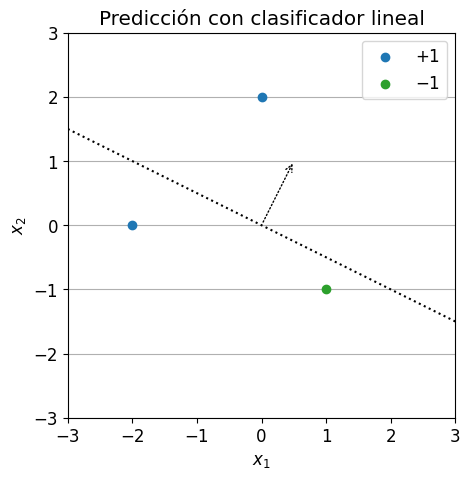

In [37]:
for x, y in train_examples:
    x = np.array(x)
    print(f"phi(x)={x}, margen={w.dot(phi(x))*y}")

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.set_axisbelow(True)

xs1plus = [x1 for (x1, x2), y in train_examples if y == +1]
xs2plus = [x2 for (x1, x2), y in train_examples if y == +1]

xs1minus = [x1 for (x1, x2), y in train_examples if y == -1]
xs2minus = [x2 for (x1, x2), y in train_examples if y == -1]

xfs = np.linspace(-3, 3)
yfs = -(w[0] / w[1]) * xfs

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.xaxis.set_ticks(range(-3, 4))
ax.yaxis.set_ticks(range(-3, 4))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Predicción con clasificador lineal")

ax.grid(axis="y")
ax.scatter(xs1plus, xs2plus, c="C0", zorder=1, label="$+1$")
ax.scatter(xs1minus, xs2minus, c="C2", zorder=1, label="$-1$")
ax.plot(xfs, yfs, ":", c="black", zorder=2)
ax.annotate(
    "",
    xy=(0, 0),
    xytext=(w[0], w[1]),
    arrowprops={
        "arrowstyle": "<-",
        "linestyle": ":",
    },
)

ax.legend();

Podemos reescribir la pérdida cero-uno en términos del margen, recordemos que el margen es positivo cuando la clasificación es correcta.

$$\mathrm{Loss}_\text{0-1}(x, y, \mathbf{w}) = \mathbf{1}[f_\mathbf{w}(x) \not= y]$$

$$\mathrm{Loss}_\text{0-1}(x, y, \mathbf{w}) = \mathbf{1}[\underbrace{(\mathbf{w}\cdot\phi(x))y}_\text{margen} \leq 0]$$

Grafiquemos el margen contra la pérdida cero uno.

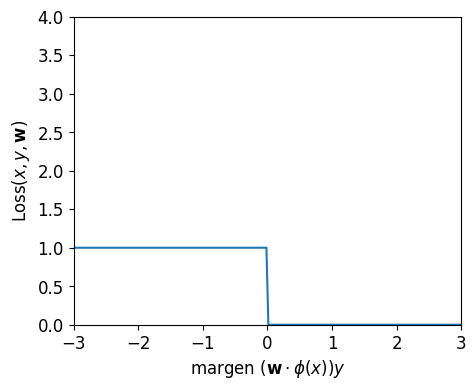

In [38]:
fig = plt.figure()
ax = plt.axes()

ms = np.linspace(-3, 3, 200)
ls = 1.0 * (ms <= 0.0)

ax.set_xlim([-3, 3])
ax.set_ylim([0, 4])
ax.set_xlabel("margen $(\mathbf{w}\cdot\phi(x))y$")
ax.set_ylabel("$\mathrm{Loss}(x, y, \mathbf{w})$")

ax.plot(ms, ls);

Una desventaja clara con utilizar la pérdida cero-uno es que tiene gradientes cero, esto significa que utilizar un algoritmo de optimización como el descenso de gradiente, fácilmente caemos en un mínimo local.

Conceptualmente, quisieramos que cuando el margen sea negativo, la pérdida sea mayor a cero, mientras que si el margen es positivo, la pérdida sea cercana a cero. Podemos tomar pérdidas más grandes entre mas negativo sea el margen y tender a cero a partir de que el margen sea positivo.

Discutamos dos funciones de pérdida alternativas que capturan el espíritu de lo anterior.

La pérdida de articulación (*Hinge loss*) penaliza linealmente los márgenes no-positivos y considera una pérdida de cero para los márgenes positivos.

Una forma usual de la pérdida de articulación es:

$$\mathrm{Loss}_\mathrm{hinge}(x, y, \mathbf{w}) = \max\{1 - (\mathbf{w}\cdot\phi(x))y, 0\}$$

El $1$ en la relación lineal nos permite tener un poco de holgura, queremos que el clasificador no solo sea correcto, si no que clasifique con un margen positivo. Un algoritmo de aprendizaje intentaría encontrar un clasificador que produzca margenes más grandes a pesar de haber encontrado un clasificador correcto.

Visualicemos cómo se comporta la pérdida conforme cambia el margen de acuerdo a las dos pérdidas que hemos visto.

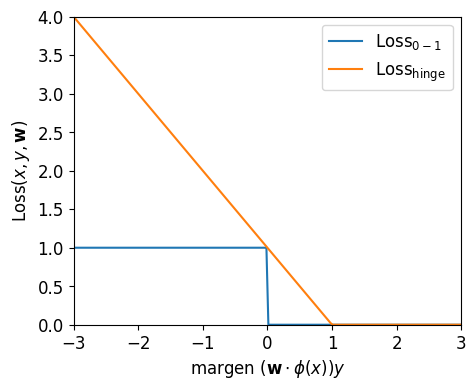

In [39]:
fig = plt.figure()
ax = plt.axes()

ms = np.linspace(-3, 3, 200)
ls1 = 1.0 * (ms <= 0.0)
ls2 = ((1.0 - ms) > 0) * (1.0 - ms)

ax.set_xlim([-3, 3])
ax.set_ylim([0, 4])
ax.set_xlabel("margen $(\mathbf{w}\cdot\phi(x))y$")
ax.set_ylabel("$\mathrm{Loss}(x, y, \mathbf{w})$")

ax.plot(ms, ls1, label="$\mathrm{Loss}_\mathrm{0-1}$")
ax.plot(ms, ls2, label="$\mathrm{Loss}_\mathrm{hinge}$")

ax.legend();

Observemos que la pérdida de articulación acota por arriba la pérdida cero-uno, también son exactamente iguales para márgenes mayores a uno.

Cuando reducimos el valor de la pérdida de articulación, también reducimos en general la pérdida cero-uno.

La pérdida logística (*Logistic loss*) es otra alternativa, la idea es intentar aumentar el margen aunque ya sea mayor a uno.

$$\mathrm{Loss}_\mathrm{logistic}(x, y, \mathbf{w}) = \ln{\left(1 + e^{-(\mathbf{w}\cdot\phi(x))y}\right)}$$

Visualicemos las tres pérdidas...

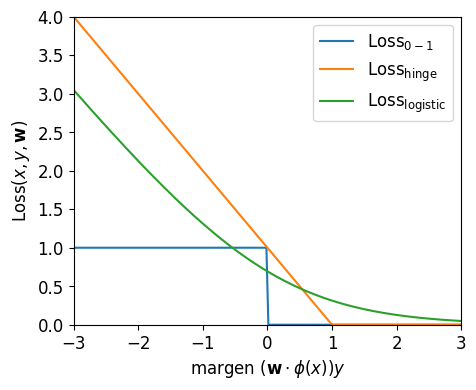

In [40]:
fig = plt.figure()
ax = plt.axes()

ms = np.linspace(-3, 3, 200)
ls1 = 1.0 * (ms <= 0.0)
ls2 = ((1.0 - ms) > 0) * (1.0 - ms)
ls3 = np.log(1 + np.exp(-ms))

ax.set_xlim([-3, 3])
ax.set_ylim([0, 4])
ax.set_xlabel("margen $(\mathbf{w}\cdot\phi(x))y$")
ax.set_ylabel("$\mathrm{Loss}(x, y, \mathbf{w})$")

ax.plot(ms, ls1, label="$\mathrm{Loss}_\mathrm{0-1}$")
ax.plot(ms, ls2, label="$\mathrm{Loss}_\mathrm{hinge}$")
ax.plot(ms, ls3, label="$\mathrm{Loss}_\mathrm{logistic}$")

ax.legend();

Elegimos la pérdida de articulación para lo que resta de la clase.

¿Cómo podemos implementarla?

In [41]:
def loss(x, y, w):
    return max(1 - phi(x).dot(w) * y, 0)

In [42]:
train_examples[0]

((0, 2), 1)

In [43]:
w

array([0.5, 1. ])

In [44]:
loss(*train_examples[0], w)

0

In [45]:
loss(*train_examples[1], w)

2.0

In [46]:
loss(*train_examples[2], w)

0.5

Calculemos el gradiente de la pérdida de articulación, consideramos dos casos, cuando el márgen es menor a uno y cuando no.

$$\mathrm{Loss}_\mathrm{hinge}(x, y, \mathbf{w}) = \max\{1 - (\mathbf{w}\cdot\phi(x))y, 0\}$$

$$\nabla\mathrm{Loss}_\mathrm{hinge}(x, y, \mathbf{w}) = \begin{cases}
-\phi(x)y &\text{si}\ 1-(\mathbf{w}\cdot\phi(x))y > 0\\
0 &\text{en otro caso}
\end{cases}$$

In [47]:
def train_loss(w):
    total = sum(max(1 - w.dot(phi(x)) * y, 0) for x, y in train_examples)
    average = 1.0 / len(train_examples) * total
    return average

In [48]:
train_loss(w)

0.8333333333333333

<center>
    <b>Algoritmo de optimización</b>
</center>

¡Utilicemos el descenso de gradiente!

Una vez que definimos la pérdida de entrenamiento utilizando la pérdida de articulación, solo tenemos que implementar el gradiente de esta nueva pérdida de entrenamiento.

In [49]:
def gradient_train_loss(w):
    total = sum(
        -phi(x) * y if 1 - w.dot(phi(x)) * y > 0 else 0 for x, y in train_examples
    )
    average = 1.0 / len(train_examples) * total
    return average

La implementación de los pesos iniciales y el algoritmo de descenso de gradiente pueden quedar intactos!

In [50]:
gradient_descent(train_loss, gradient_train_loss, initial_weights)

epoch 0: w = [-0.1  0.1], F(w) = 1.0000, gradientF = [ 1. -1.]
epoch 1: w = [-0.2  0.2], F(w) = 0.8000, gradientF = [ 1. -1.]
epoch 2: w = [-0.3  0.3], F(w) = 0.6000, gradientF = [ 1. -1.]
epoch 3: w = [-0.4  0.4], F(w) = 0.4000, gradientF = [ 1. -1.]
epoch 4: w = [-0.5  0.5], F(w) = 0.2000, gradientF = [ 1. -1.]
epoch 5: w = [-0.5  0.5], F(w) = 0.0000, gradientF = 0.0
epoch 6: w = [-0.5  0.5], F(w) = 0.0000, gradientF = 0.0
epoch 7: w = [-0.5  0.5], F(w) = 0.0000, gradientF = 0.0
epoch 8: w = [-0.5  0.5], F(w) = 0.0000, gradientF = 0.0
epoch 9: w = [-0.5  0.5], F(w) = 0.0000, gradientF = 0.0


## Repaso

**¿Qué predictores son posibles?**

Construimos una *clase de hipótesis*.

En lo que discutimos, consideramos *fontera de decisión lineal*.

**¿Qué tan bueno es un predictor?**

Construimos una *función de pérdida*.

Consideramos la pérdida cero-uno, de articulación y logística.

**¿Cómo calcular el mejor predictor?**

Construimos un *algoritmo de optimización*.

Usamos *descenso de gradiente*

# Descenso de gradiente estocástico

En los dos tipos de problemas que discutimos en clases pasadas, utilizamos el descenso de gradiente, un algoritmo de propósito general para optimizar la pérdida de entrenamiento.

$$\mathrm{TrainLoss}(\mathbf{w}) = \frac{1}{|\mathcal{D}_\mathrm{train}|} \sum_{(x,y)\in\mathcal{D}_\mathrm{train}} \mathrm{Loss}(x, y, \mathbf{w})$$

*Descenso de gradiente:*
1. Inicializamos $\mathbf{w}$ a algún valor
2. Luego realizamos la siguiente actualización $T$ veces:
3. $\mathbf{w} \gets \mathbf{w} - \eta\nabla_\mathbf{w}\mathrm{TrainLoss}(\mathbf{w})$


Sin embargo, este algoritmo es muy lento, la pérdida de entrenamiento realiza una sumatoria sobre todos los datos de entrenamiento. Si tenemos millones de ejemplos, entonces cada cálculo del gradiente requiere considerar cada uno de estos millones de ejemplos. Todo esto antes de ajustar el modelo aunque sea poquito.

¿Podemos ir mejorando el modelo antes de procesar todos los ejemplos?

La respuesta es el descenso de gradiente estocástico (*SGD* por *Stochastic Gradient Descent*)

En lugar de iterar sobre todos los ejemplos para calcular un gradiente y dar un paso, el SGD itera sobre los ejemplos y actualiza los pesos en cada ejemplo.

Cada actualización no es tan buena ya que la actualización del modelo es en base a un solo ejemplo, sin embargo, podemos hacer más actualizaciones de esta forma.

*Descenso de gradiente estocástico:*
1. Inicializamos $\mathbf{w}$ a algún valor
2. Luego realizamos lo siguiente $T$ veces
3. Para cada ejemplo $(x, y)$ en $\mathcal{D}_\mathrm{train}$:
4. $\mathbf{w}\gets\mathbf{w}-\eta\nabla_\mathbf{w}\mathrm{Loss}(x, y, \mathbf{w})$

<center>
    <img src="./sgd.png" />
</center>

¿Prefieren *calidad* o *cantidad*? El SGD prefiere cantidad

Solo hay un detalle... Elegir el tamaño de paso puede ser complicado.

Entre más grande sea $\eta$ más agresivo es el descenso, podemos llegar al mínimo más rápido, pero también enfierrarnos de más y nunca llegar a él.

Si elegimos un $\eta$ muy pequeño, las actualizaciones serían mas estables, pero llegaríamos al mínimo demasiado lento. En el caso extremo cuando $\eta = 0$ el modelo nunca es actualizado.

Una forma de mitigar esto es variar $\eta$ en cada actualización del modelo. En particular, vamos a considerar que iniciamos con $\eta=1$ y luego ajustarla en función a la cantidad de actualizaciones realizadas hasta el momento $u$,
$$\eta \gets \frac{1}{\sqrt{u}}$$

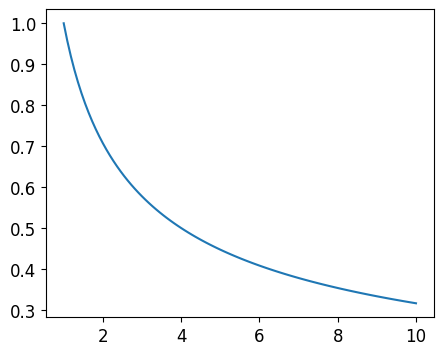

In [51]:
fig = plt.figure()
ax = plt.axes()

xs = np.linspace(1, 10, 100)
ys = 1.0 / np.sqrt(xs)

ax.plot(xs, ys);

---

Consideremos el problema de regresión lineal, pero utilizando datos de entrenamiento aleatorios.

Vamos a considerar un modelo lineal para generar los datos, representado por un vector de cinco componentes (pensemos en un hiperplano en cinco dimensiones).

Este será nuestro vector de pesos "real", pero ni la pérdida ni el SGD sabrán que valores tiene.

In [52]:
trueW = np.array([1, 2, 3, 4, 5])

Generamos ejemplos donde la entrada $x$ es un vector aleatorio donde cada componente sigue la distribución normal. Luego obtenemos la salida que predice el vector de persos real y le agregamos ruido, también con distribución normal.

In [53]:
v = np.random.randn(10000)

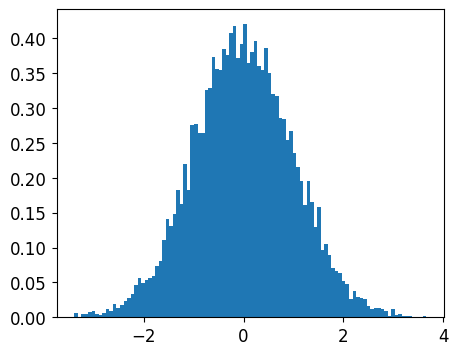

In [54]:
fig = plt.figure()
ax = plt.axes()

ax.hist(v, bins=100, density=True);

In [55]:
def generate():
    x = np.random.randn(len(trueW))
    y = trueW.dot(x) + np.random.normal(0, 2)
    return (x, y)

Generemos los datos de entrenamiento con un millón de ejemplos

In [56]:
N = 1000000

In [57]:
train_examples = [generate() for i in range(N)]

Recordemos cómo modelamos en programas de Python la regresión lineal

In [58]:
def phi(x):
    return np.array(x)

In [59]:
def initial_weights():
    return np.zeros(len(trueW))

Para descenso de gradiente:

In [60]:
def train_loss(w):
    total = sum((w.dot(phi(x)) - y) ** 2 for x, y in train_examples)
    average = 1.0 / len(train_examples) * total
    return average

In [61]:
def gradient_train_loss(w):
    total = sum(2 * (w.dot(phi(x)) - y) * phi(x) for x, y in train_examples)
    average = 1.0 / len(train_examples) * total
    return average

Para descenso de gradiente estocástico:

In [62]:
def loss(w, i):
    x, y = train_examples[i]
    return (w.dot(phi(x)) - y) ** 2

In [63]:
def gradient_loss(w, i):
    x, y = train_examples[i]
    return 2 * (w.dot(phi(x)) - y) * phi(x)

In [64]:
GDepochs = 10
SGDepochs = 5

In [65]:
def gradientDescent(F, gradientF, init):
    w = init()
    eta = 0.1
    for t in range(GDepochs):
        value = F(w)
        gradient = gradientF(w)
        w = w - eta * gradient
        print(f"epoch {t}: w = {w}, F(w) = {value:.4f}, gradientF = {gradient}")

In [66]:
def stochasticGradientDescent(f, gradientf, n, init):
    w = init()
    numUpdates = 0
    for t in range(SGDepochs):
        for i in range(n):
            value = f(w, i)
            gradient = gradientf(w, i)
            numUpdates += 1
            eta = 1.0 / np.sqrt(numUpdates)
            w = w - eta * gradient
        print(f"epoch {t}: w = {w}, F(w) = {value:.4f}, gradientF = {gradient}")

In [67]:
%%timeit -r1 -n1
gradientDescent(train_loss, gradient_train_loss, initial_weights)

epoch 0: w = [0.19940266 0.40158894 0.59929737 0.79766414 0.99958827], F(w) = 58.9303, gradientF = [-1.99402657 -4.01588943 -5.99297371 -7.97664145 -9.99588265]
epoch 1: w = [0.35896158 0.72251302 1.07878309 1.43617309 1.79927406], F(w) = 39.1685, gradientF = [-1.59558926 -3.20924077 -4.7948572  -6.38508945 -7.99685793]
epoch 2: w = [0.48663811 0.97897455 1.46240993 1.94728249 2.43903502], F(w) = 26.5178, gradientF = [-1.27676532 -2.56461534 -3.83626843 -5.11109403 -6.39760962]
epoch 3: w = [0.58880281 1.18392155 1.76934203 2.35641193 2.9508538 ], F(w) = 18.4195, gradientF = [-1.02164699 -2.04946991 -3.06932096 -4.09129434 -5.11818778]
epoch 4: w = [0.67055332 1.34770131 2.01491221 2.6839091  3.36031694], F(w) = 13.2352, gradientF = [-0.81750507 -1.63779762 -2.4557018  -3.27497169 -4.09463147]
epoch 5: w = [0.7359687  1.47858282 2.21138796 2.9460618  3.68789406], F(w) = 9.9165, gradientF = [-0.65415379 -1.3088151  -1.96475752 -2.62152706 -3.27577111]
epoch 6: w = [0.78831296 1.58317416

In [68]:
%%timeit -r1 -n1
stochasticGradientDescent(loss, gradient_loss, len(train_examples), initial_weights)

epoch 0: w = [0.97276181 1.97312897 2.96849674 3.96047592 4.98256619], F(w) = 5.2538, gradientF = [-4.23964938 14.0893099  -5.84715769 -4.67062722  5.46348568]
epoch 1: w = [0.9724761  1.98712495 2.95796086 3.96691525 4.9865667 ], F(w) = 5.4218, gradientF = [-4.30688133 14.31273682 -5.93988135 -4.74469358  5.55012511]
epoch 2: w = [0.97235203 1.99217916 2.95518676 3.97067006 4.98916884], F(w) = 5.4681, gradientF = [-4.32525619 14.37380061 -5.96522324 -4.76493632  5.57380414]
epoch 3: w = [0.97229731 1.99438911 2.95482684 3.97294073 4.99102147], F(w) = 5.4776, gradientF = [-4.32899442 14.3862236  -5.97037886 -4.76905456  5.57862146]
epoch 4: w = [0.97231591 1.99536061 2.95540047 3.97438736 4.99243186], F(w) = 5.4723, gradientF = [-4.32691314 14.37930703 -5.96750844 -4.7667617   5.57593939]
15.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [69]:
train_loss(np.array([0.98478211, 2.02829034, 2.98268202, 4.05039687, 5.0458254]))

4.018805603140632

---

# Optimización de grupo distribucionalmente robusta

También llamada *group DRO* por *group distributionally robust optimization*.

---

Hasta ahora nos hemos enfocado en encontrar modelos que minimizan la pérdida de entrenamiento, la cuál es el promedio de la pérdida sobre los ejemplos de entrenamiento.

Considerar el promedio puede parecer intuitivo y quizá “lo correcto”... Veamos por qué esto puede nos er el caso...

Ver video: http://gendershades.org/

El proyecto *Gender Shades* es solo uno de los muchos ejemplos que apuntan a un problema general y sistémico: los modelos de aprendizaje máquina, típicamente optimizados para maximizar la precisión promedio, pueden resultar en precisiones pobres para ciertos **grupos** (subpoblaciones).

Estos grupos pueden ser definidos por clases protegidas. De acuerdo a la CNDH algunos temas relativos a grupos vulnerables en México son:
- Personas Migrantes
- Personas en Situación de Víctimas
- Niñas, Niños y Adolescentes
- Jóvenes, Personas Mayores y Familias
- Personas desaparecidas y no localizadas
- Sexualidad, Salud y VIH
- Igualdad entre Mujeres y Hombres
- Periodistas y Personas Defensoras Civiles
- Contra la Trata de Personas
- Pueblos y Comunidades Indígenas y Afrodescendientes
- Personas con Discapacidad
- Prevención de la Tortura
- Personas Privadas de la Libertad
- Derechos Económicos, Sociales, Culturales y Ambientales

(Ver http://informe.cndh.org.mx/menu.aspx?id=80002)

Puedes consultar información sobre el trabajo legislativo de nuestros representantes que constituyen la comisión de *Atención a Grupos Vulnerables* en la *Cámara de Diputados*: https://web.diputados.gob.mx/inicio/comision?Oid=f8cfe362-3718-4e81-b0f6-9a85f0a12ecc

En un caso particular, un hombre negro con el nombre de Robert Julian-Borchak Williams fue arrestado por error debido a una coincidencia incorrecta con otro hombre negro capturado en un video de vigilancia. Este error fue cometido por un sistema de reconocimiento facial.

(Ver https://www.nytimes.com/2020/06/24/technology/facial-recognition-arrest.html)

Con el proyecto Gender Shades, podemos ver que precisiones más bajas para algunos grupos pueden tener consecuencias en la vida real, como más arrestos erróneos, lo cuál agravia aún más las desigualdades que existen actualmente en nuestra sociedad.

Vamos a enfocarnos en las disparidades de rendimiento en el aprendizaje máquina y cómo podemos mitigarlas.

<center>
    <b>Regresión lineal con grupos</b>
</center>

Consideremos la regresión lineal.

Comenzamos con datos de entrenamiento, pero ahora cada ejemplo consiste no solo de la entrada $x$ y la salida $y$, si no también de un **grupo** $g$.

En este ejemplo, suponemos que tenemos dos grupos $A$ y $B$.

<center>
    <img src="./dro00.png" />
</center>

In [70]:
train_examples = [
    (1, 4, "A"),
    (2, 8, "A"),
    (5, 5, "B"),
    (6, 6, "B"),
    (7, 7, "B"),
    (8, 8, "B"),
]

pred_x = 3

$$\phi(x) = [x]$$

In [71]:
def phi(x):
    return np.array([x])

$$f_\mathbf{w}(x) = \mathbf{w}\cdot\phi(x)$$

In [72]:
def predict(w, x):
    return np.dot(w, x)

$$\mathrm{Loss}(\mathbf{w}, x, y) = (f_\mathbf{w}(x)-y)^2$$

In [73]:
def loss(w, x, y):
    return (predict(w, x) - y) ** 2

$$\mathrm{TrainLoss}(\mathbf{w}) = \frac{1}{|\mathcal{D}_\mathrm{train}|} \sum_{(x,y,g)\in\mathcal{D}_\mathrm{train}} \mathrm{Loss}(\mathbf{w}, x, y)$$

In [74]:
def train_loss(w):
    total = sum(loss(w, x, y) for x, y, g in train_examples)
    return total / len(train_examples)

$$\begin{aligned}
\nabla_\mathbf{w}\mathrm{Loss}(\mathbf{w}, x, y) &= \nabla_\mathbf{w} (f_\mathbf{w}(x)-y)^2 \\
                                                 &= \nabla_\mathbf{w} ((\mathbf{w}\cdot\phi(x))-y)^2 \\
                                                 &= 2\left((\mathbf{w}\cdot\phi(x))-y\right)\nabla_\mathbf{w}\left((\mathbf{w}\cdot\phi(x))-y\right)  \\
                                                 &= 2(f_\mathbf{w}(x)-y)\nabla_\mathbf{w}\left((\mathbf{w}\cdot\phi(x))-y\right)  \\
                                                 &= 2(f_\mathbf{w}(x)-y)\left( \nabla_\mathbf{w}(\mathbf{w}\cdot\phi(x)) - \nabla_\mathbf{w}y\right)  \\
                                                 &= 2(f_\mathbf{w}(x)-y)\nabla_\mathbf{w}(\mathbf{w}\cdot\phi(x))  \\
                                                 &= 2(f_\mathbf{w}(x)-y)\phi(x)  \\
                                                 \\
\nabla_\mathbf{w}\mathrm{TrainLoss}(\mathbf{w}) &= \nabla_\mathbf{w}\left(\frac{1}{|\mathcal{D}_\mathrm{train}|} \sum_{(x,y,g)\in\mathcal{D}_\mathrm{train}} \mathrm{Loss}(\mathbf{w}, x, y)\right) \\
                                                &= \frac{1}{|\mathcal{D}_\mathrm{train}|} \sum_{(x,y,g)\in\mathcal{D}_\mathrm{train}} \nabla_\mathbf{w}\mathrm{Loss}(\mathbf{w}, x, y)
\end{aligned}$$

In [75]:
def gradient_loss(w, x, y):
    return 2 * (predict(w, x) - y) * phi(x)


def gradient_train_loss(w):
    total = sum(gradient_loss(w, x, y) for x, y, g in train_examples)
    return total / len(train_examples)

$$\begin{aligned}
\eta &\gets 0.1 \\
\mathbf{w} &\gets [0] \\
\mathbf{w} &\gets \mathbf{w} - \eta\nabla_\mathbf{w}\mathrm{TrainLoss}(\mathbf{w})
\end{aligned}$$

In [76]:
def gradientDescent(loss, gradient_loss, eta=0.1, w=np.array([0.0]), N=20):
    for i in range(N):
        w = w - eta * gradient_loss(w)
        # print(f"epoch={i} w={w} loss={loss(w)} ∇loss={gradient_loss(w)}")
    return w, loss(w), gradient_loss(w)

Obtenemos un buen modelo para los datos de entrenamiento

In [77]:
w, lossW, gradientLossW = gradientDescent(train_loss, gradient_train_loss)

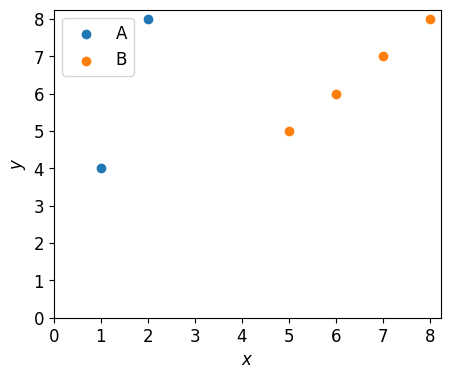

In [78]:
fig = plt.figure()
ax = plt.axes()

xs1 = np.array([x for x, y, g in train_examples if g == "A"])
ys1 = np.array([y for x, y, g in train_examples if g == "A"])
xs2 = np.array([x for x, y, g in train_examples if g == "B"])
ys2 = np.array([y for x, y, g in train_examples if g == "B"])

pxs = np.linspace(0, 8, 100)
pys = w[0] * pxs

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim(0, 8.25)
ax.set_ylim(0, 8.25)
ax.set_xticks(range(9))
ax.set_yticks(range(9))

ax.scatter(xs1, ys1, label="A")
ax.scatter(xs2, ys2, label="B")
ax.plot(pxs, pys, color="black")

ax.legend();

¿Cómo se ve la minimización de la pérdida promedio de entrenamiento?

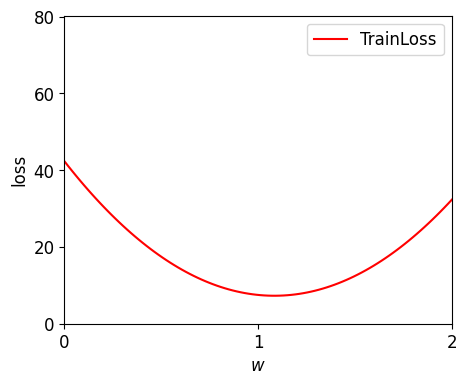

In [79]:
fig = plt.figure()
ax = plt.axes()


ws = np.linspace(0, 2, 100)
ls = np.array([train_loss(np.array(w)) for w in ws])

ax.set_xlabel("$w$")
ax.set_ylabel("loss")
ax.set_xlim(0, 2)
ax.set_ylim(0, 80.25)
ax.set_xticks(range(3))
ax.set_yticks(range(0, 81, 20))

ax.plot(ws, ls, c="r", label="TrainLoss")
ax.scatter(w, lossW, c="r")

ax.legend();

Analicemos la pérdida promedio de entrenamiento **por grupo**.

In [80]:
def train_loss_g(w, group):
    examples = [loss(w, x, y)
                for x, y, g 
                in train_examples
                if g == group]
    return sum(examples) / len(examples)

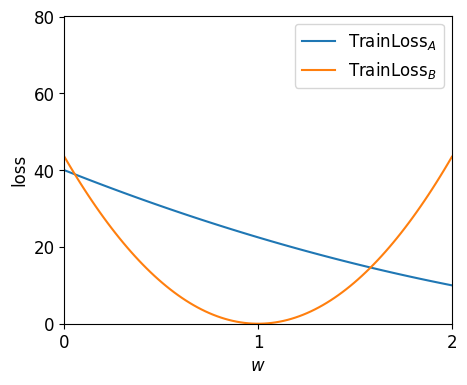

In [81]:
fig = plt.figure()
ax = plt.axes()

ws = np.linspace(0, 2, 100)
lsA = np.array([train_loss_g(np.array(w), 'A') for w in ws])
lsB = np.array([train_loss_g(np.array(w), 'B') for w in ws])

ax.set_xlabel("$w$")
ax.set_ylabel("loss")
ax.set_xlim(0, 2)
ax.set_ylim(0, 80.25)
ax.set_xticks(range(3))
ax.set_yticks(range(0, 81, 20))

ax.plot(ws, lsA, label="$\mathrm{TrainLoss}_A$")
ax.plot(ws, lsB, label="$\mathrm{TrainLoss}_B$")

ax.legend();


$$\mathrm{TrainLoss}_\mathrm{max}(\mathbf{w}) = \max_g\mathrm{TrainLoss}_g(\mathbf{w})$$

$$\nabla_\mathbf{w}\mathrm{TrainLoss}_\mathrm{max}(\mathbf{w}) = \nabla_\mathbf{w}\mathrm{TrainLoss}_{g^\ast}(\mathbf{w})$$

$$g^\ast = \mathrm{argmax}_g\mathrm{TrainLoss}_g(\mathbf{w})$$

# Predictores no-lineales

Hemos discutido las componentes principales de problemas de regresión y clasificación.

1. Datos de entrenamiento $\mathcal{D}$, nuestro conjunto de ejemplos con entradas $x$ y salidas $y$
2. Clase de hipótesis $\mathcal{F}$, el conjunto de todos los modelos de predicción que consideramos en el aprendizaje
3. Función de pérdida $\mathrm{Loss}(\mathbf{w}, x, y)$, mide qué tan mal predice el modelo inducido por $\mathbf{w}$ al ejemplo con entrada $x$ y salida $y$
4. Algoritmo de optimización, como descenso de gradiente, nos permite encontrar un modelo que minimiza la pérdida de los datos de entrenamiento

En particular, los modelos que discutimos son lineales, esto en el sentido que el cálculo fundamental que realizan es $\mathbf{w}\cdot\phi(x)$.

La función $\phi$ es llamada el extractor de características y $\phi(x)$ es llamado vector de características.

En el caso de la regresión lineal, consideramos modelos parametrizados por un vector de pesos con dos componentes reales y $\phi(x) = [1, x]$.

In [132]:
def grafica(ws, colores):
    fig = plt.figure()
    ax = plt.axes()
    phi = lambda x: np.array([1.0, x])
    xs = np.linspace(0, 5, 100)
    ys = [np.array([np.dot(w, phi(x)) for x in xs]) for w in ws]
    cs = mpl.colormaps[colores](np.linspace(0,1,len(ys)+2))[1:]
    for y, c in zip(ys, cs):
        ax.plot(xs, y, color=c)
    ax.set_xlim([0, 5]);
    ax.set_ylim([0, 6]);

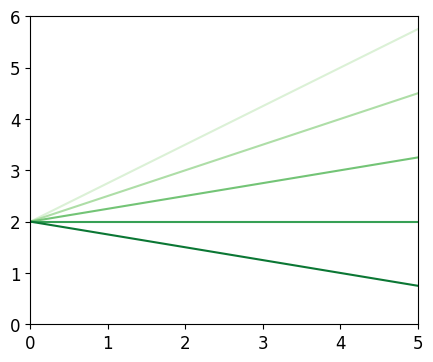

In [138]:
grafica([np.array([2.0, 0.75 - 0.25 * i]) for i in range(5)], "Greens")

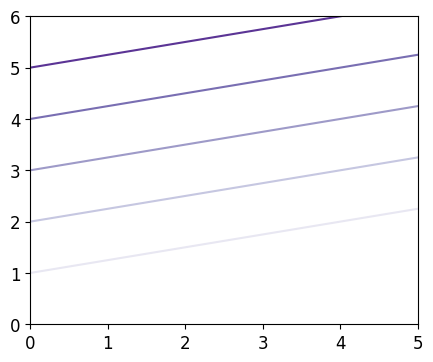

In [134]:
grafica([np.array([1 + i, 0.25]) for i in range(5)], "Purples")

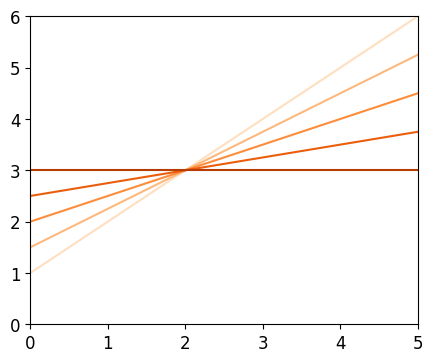

In [135]:
grafica([np.array([1.0 + 0.5 * i, 1.0 - 0.25 * i]) for i in range(5)], "Oranges")

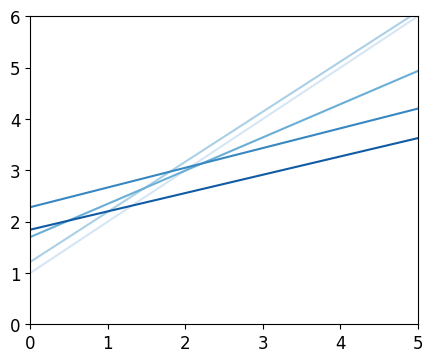

In [136]:
grafica([np.array([1.0 + 0.5 * np.random.rand() * i, 1.0 - 0.25 * np.random.rand() * i]) for i in range(5)], "Blues")

Consideremos utilizar un extractor de características cuadrático...

$$\phi(x) = [1, x, x^2]$$

In [130]:
def grafica(ws, colores):
    phi = lambda x: np.array([1.0, x, x**2])
    fig = plt.figure()
    ax = plt.axes()
    xs = np.linspace(0, 5, 100)
    ys = [np.array([np.dot(w, phi(x)) for x in xs]) for w in ws]
    cs = mpl.colormaps[colores](np.linspace(0,0.5,len(ys)))
    for y, c in zip(ys, cs):
        ax.plot(xs, y, color=c)
    ax.set_xlim([0, 5]);
    ax.set_ylim([0, 6]);

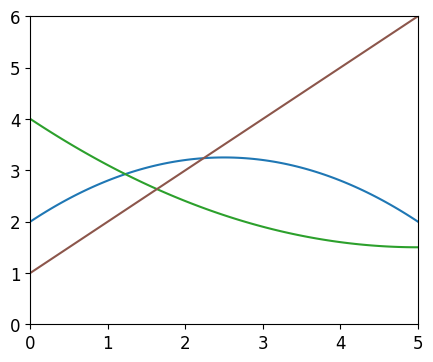

In [131]:
grafica(
    [
        np.array([2, 1, -0.2]),
        np.array([4, -1, 0.1]),
        np.array([1, 1, 0]),
    ],
    "tab10",
)

**¿Qué acaba de ocurrir?**

El extractor de características $\phi$ puede ser arbitrario. Entonces incluímos un término adicional $x^2$.

Consideremos el cálculo principal del predictor $\mathbf{w}\cdot\phi(x)$, esta relación es lineal con respecto a $\mathbf{w}$ y $\phi(x)$. Pero no necesita ser lineal en $x$, las entradas pudieran ser incluso objetos distintos a los vectores.

El algoritmo de aprendizaje observa a $\phi(x)$ pero no a $x$.

**¿Qué otras maniacadas podemos conjurar?**

$$\phi(x) = [1, x, x^2, \cos{(3x)}]$$

In [139]:
def grafica(ws, colores):
    phi = lambda x: np.array([1.0, x, x**2, np.cos(3 * x)])
    fig = plt.figure()
    ax = plt.axes()
    xs = np.linspace(0, 5, 100)
    ys = [np.array([np.dot(w, phi(x)) for x in xs]) for w in ws]
    cs = mpl.colormaps[colores](np.linspace(0,0.5,len(ys)))
    for y, c in zip(ys, cs):
        ax.plot(xs, y, color=c)
    ax.set_xlim([0, 5]);
    ax.set_ylim([0, 6]);

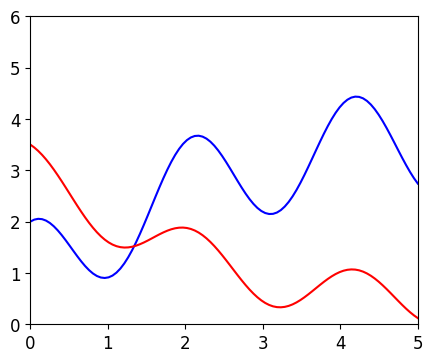

In [152]:
grafica(
    [
        np.array([1, 1, -0.1, 1]),
        np.array([3, -1, 0.1, 0.5]),
    ],
    "brg",
)

Usualmente, la elección de características depende de la tarea de predicción que nos interesa resolver.

Por ejemplo, si $x$ representa el tiempo y tenemos la sospecha que la salida real $y$ varía de acuerdo a alguna estructura periódica, entonces podemos incorporar características periódicas como el coseno para capturar esas tendencias.

Cada característica puede representar algún tipo de estructura en los datos. Las características que incluyamos en nuestro predictor representan las propiedades que **pudieran** ser útiles para la predicción. Si una de estas no es útil, el algoritmo de aprendizaje puede *asignarle* un peso cercano a cero.

Retoma lo que discutimos sobre clasificadores lineales y considera las siguientes modificaciones:

$$\phi(x) = [x_1, x_2, x_1^2 + x_2^2]$$

$$f_\mathbf{w}(x) = \mathrm{sign}(\mathbf{w}\cdot\phi(x))$$

Explora qué clasificamos con el modelo parametrizado por $\mathbf{w} = [2, 2, -1]$.